In [1]:
import pandas as pd
import time
import numpy as np
# from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV,StratifiedKFold, KFold
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import random
from sklearn import preprocessing
from bhtsne import tsne
from sklearn.decomposition import PCA
import gc
from scipy.stats import skew, boxcox
# from bayes_opt import BayesianOptimization
from scipy import sparse
# from sklearn.metrics import log_loss
from datetime import datetime
# from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seed = 2017

# Load Data

In [2]:
data_path = "../input/"
train_X = pd.read_csv(data_path + 'train_BM_MB_add03052240.csv')
test_X = pd.read_csv(data_path + 'test_BM_MB_add03052240.csv')
train_y = np.ravel(pd.read_csv(data_path + 'labels_BrandenMurray.csv'))
sub_id = test_X.listing_id.astype('int32').values
# all_features = features_to_use + desc_sparse_cols + feat_sparse_cols
print train_X.shape, test_X.shape, train_y.shape

(49352, 322) (74659, 322) (49352,)


In [3]:
full_data=pd.concat([train_X,test_X])
features_to_use = train_X.columns.values

skewed_cols = full_data[features_to_use].apply(lambda x: skew(x.dropna()))

SSL = preprocessing.StandardScaler()
skewed_cols = skewed_cols[skewed_cols > 0.25].index.values
for skewed_col in skewed_cols:
    full_data[skewed_col], lam = boxcox(full_data[skewed_col] - full_data[skewed_col].min() + 1)
#     print skewed_col, '\t', lam
for col in features_to_use:
    full_data[col] = SSL.fit_transform(full_data[col].values.reshape(-1,1))
#     train_X[col] = full_data.iloc[:ntrain][col]
#     test_X[col] = full_data.iloc[ntrain:][col]

    
# del full_data

/home/xujin/AI/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
full_data.shape

(124011, 322)

In [5]:
full_data_pca = PCA(n_components = 50).fit_transform(full_data)

In [6]:
full_data_pca.shape

(124011, 50)

In [7]:
full_data_tsne = tsne(full_data_pca, dimensions=3, perplexity=40)
full_data_tsne.shape

(124011, 3)

In [12]:
X_train_tsne = full_data_tsne[:49352]
X_test_tsne = full_data_tsne[49352:]
print X_train_tsne.shape
print X_test_tsne.shape

(49352, 3)
(74659, 3)


In [10]:
now = datetime.now()


name_X_train_tsne = '../input/X_train_tsne_BM_0322_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
name_X_test_tsne = '../input/X_test_tsne_BM_0322_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'

np.savetxt(name_X_train_tsne,X_train_tsne, delimiter=",")
np.savetxt(name_X_test_tsne,X_test_tsne, delimiter=",")

In [21]:
X_train_tsne.shape

(49352, 3)

In [22]:
X_test_tsne.shape

(74659, 522)

In [13]:

# Y = tsne_fun.fit_transform(X_train_embedded)
X_train_embedded_1 = pd.DataFrame(X_train_embedded, columns = ['tsne1','tsne2','tsne3'])

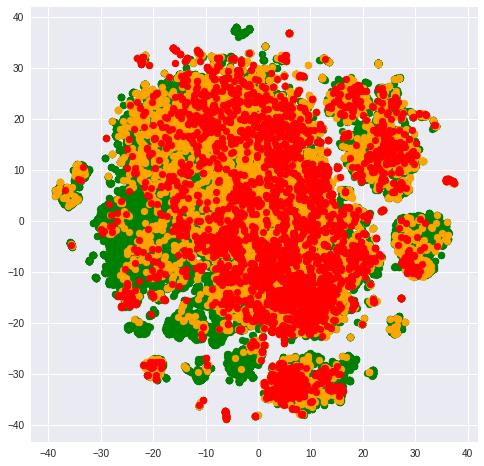

In [15]:
train_y = pd.DataFrame(train_y,columns = ['target'])
usable_train =  pd.concat([X_train_embedded,train_y[:n]],axis = 1)

# limit number of bedrooms and prices

palette = {2: "r", 0:"g", 1:"orange"}
plt.figure(figsize=(8,8))
for interest in [0,1,2]:
    plt.scatter(usable_train[usable_train.target==interest].tsne1, 
                usable_train[usable_train.target==interest].tsne2, 
                c=palette[interest])

